# Imports/ Ingestion


In [415]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [416]:
df = pd.read_csv('/kaggle/input/train-and-test-data/train.csv')

# Preprocessing

## Data Insights

In [417]:
df.shape

(524164, 11)

In [418]:
df.count()

id                           524164
RhythmScore                  524164
AudioLoudness                524164
VocalContent                 524164
AcousticQuality              524164
InstrumentalScore            524164
LivePerformanceLikelihood    524164
MoodScore                    524164
TrackDurationMs              524164
Energy                       524164
BeatsPerMinute               524164
dtype: int64

In [419]:
df.head()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [420]:
df.tail()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
524159  524159     0.796831     -13.405645      0.023500         0.504738   
524160  524160     0.975000     -12.132914      0.077379         0.069462   
524161  524161     0.542958      -1.357000      0.071390         0.168978   
524162  524162     0.637192      -7.411331      0.113086         0.000005   
524163  524163     0.776515      -5.484091      0.023500         0.271189   

        InstrumentalScore  LivePerformanceLikelihood  MoodScore  \
524159           0.000001                   0.191414   0.668079   
524160           0.262320                   0.124818   0.288946   
524161           0.000001                   0.313912   0.586868   
524162           0.061946                   0.287963   0.368891   
524163           0.067338                   0.339319   0.793487   

        TrackDurationMs    Energy  BeatsPerMinute  
524159      135528.3189  0.004400       117.83118  
524160      240709.3918  0.447067        89.02681  
524161      344858.2321  0.718800        90.75885  
524162      322710.3187  0.944267       140.63235  
524163      313870.0566  0.223933        77.45960

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [422]:
cols = df.columns
cols

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [423]:
df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

Therefore no null values

In [424]:
df.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  524164.000000  524164.000000  524164.000000  524164.000000   
mean   262081.500000       0.632843      -8.379014       0.074443   
std    151313.257586       0.156899       4.616221       0.049939   
min         0.000000       0.076900     -27.509725       0.023500   
25%    131040.750000       0.515850     -11.551933       0.023500   
50%    262081.500000       0.634686      -8.252499       0.066425   
75%    393122.250000       0.739179      -4.912298       0.107343   
max    524163.000000       0.975000      -1.357000       0.256401   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    524164.000000      524164.000000              524164.000000   
mean          0.262913           0.117690                   0.178398   
std           0.223120           0.131845                   0.118186   
min           0.000005           0.000001                   0.024300   
25%           0.069413           0.000001                   0.077637   
50%           0.242502           0.074247                   0.166327   
75%           0.396957           0.204065                   0.268946   
max           0.995000           0.869258                   0.599924   

           MoodScore  TrackDurationMs         Energy  BeatsPerMinute  
count  524164.000000    524164.000000  524164.000000   524164.000000  
mean        0.555843    241903.692949       0.500923      119.034899  
std         0.225480     59326.601501       0.289952       26.468077  
min         0.025600     63973.000000       0.000067       46.718000  
25%         0.403921    207099.876625       0.254933      101.070410  
50%         0.564817    243684.058150       0.511800      118.747660  
75%         0.716633    281851.658500       0.746000      136.686590  
max         0.978000    464723.228100       1.000000      206.037000

In [425]:
BPM_max = df['BeatsPerMinute'].max()
BPM_max

206.037

In [426]:
BPM_min = df['BeatsPerMinute'].min()
BPM_min

46.718

## Data Cleaning

In [427]:
df.shape

(524164, 11)

In [428]:
df.drop_duplicates(inplace= True)
df.shape

(524164, 11)

## Removing outliers

### Checking for outliers

In [429]:
cols = cols.drop('id')

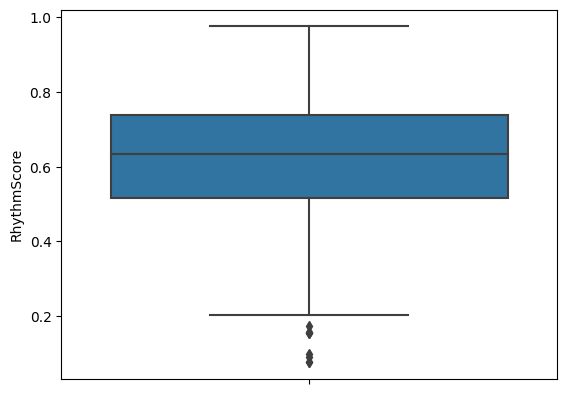

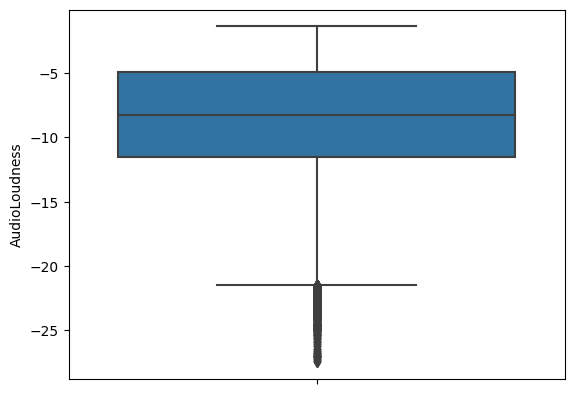

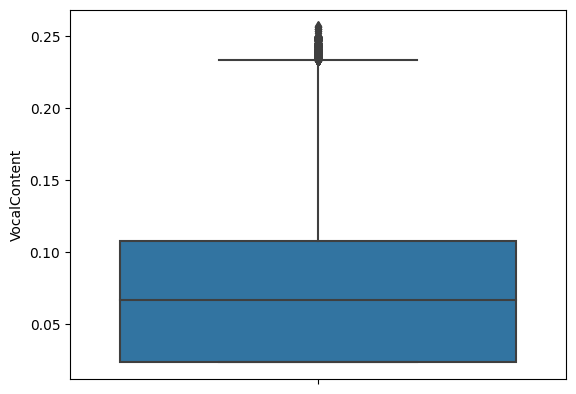

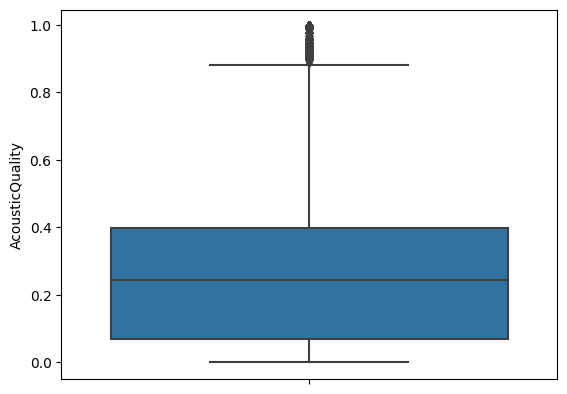

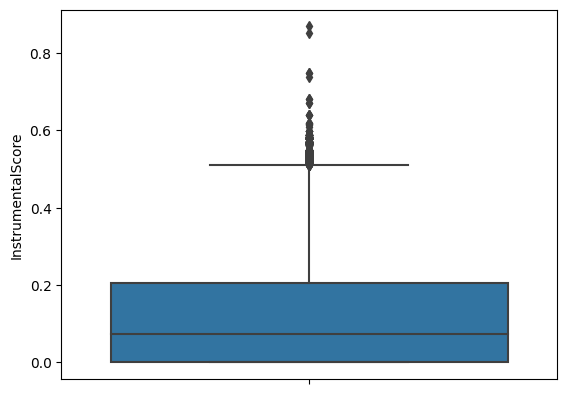

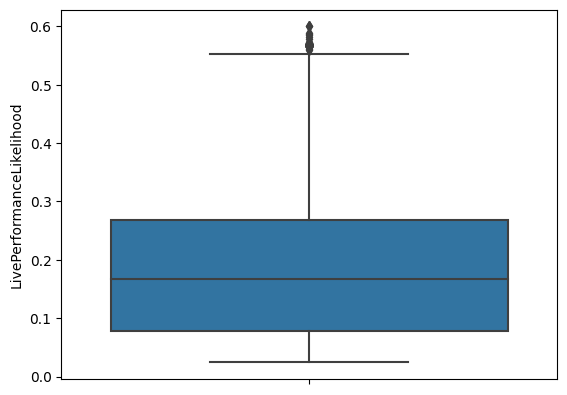

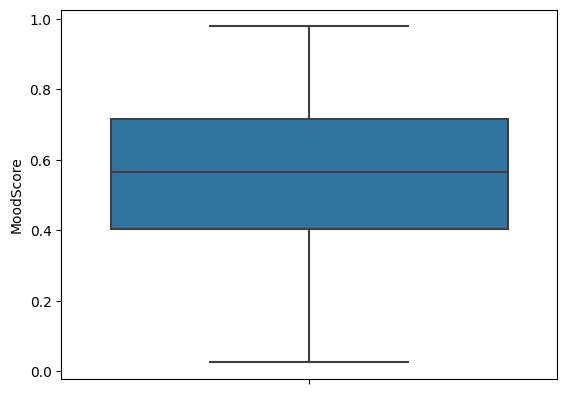

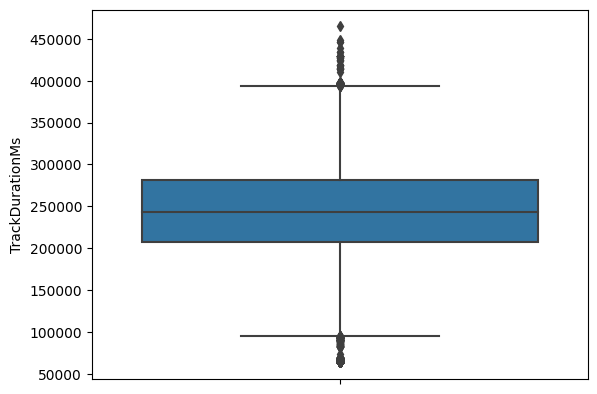

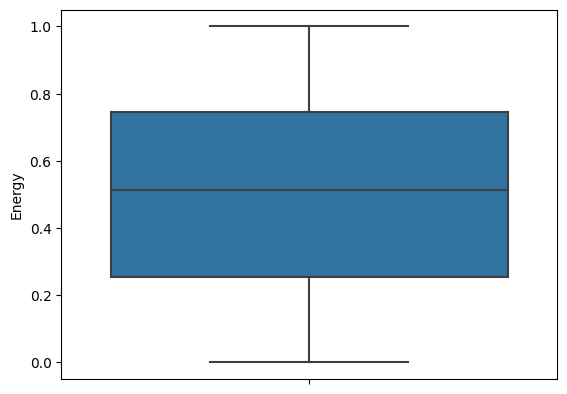

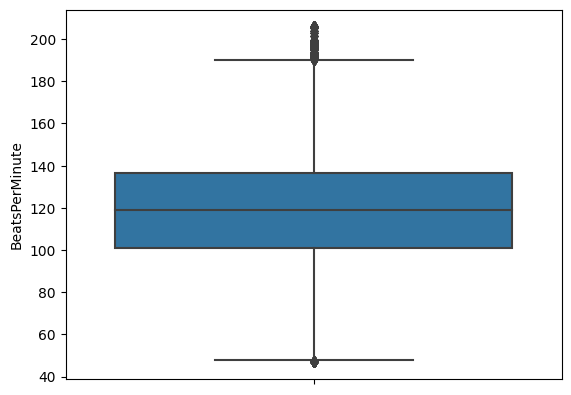

In [430]:
for c in cols:
  sns.boxplot(data = df, y =df[c] )
  plt.show()

### Removing outliers

In [431]:
for column in cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1
  #Bounds:
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  # outliers = df[(df[column]>upper) | (df[column]<lower)]
  # #print(f"Total outliers w.r.t {column} = {outliers.sum}")
  df = df[(df[column]<upper) & (df[column]>lower)]
print("\n Final df\n")
df


 Final df



id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0            0     0.603610      -7.636942      0.023500         0.000005   
1            1     0.639451     -16.267598      0.071520         0.444929   
2            2     0.514538     -15.953575      0.110715         0.173699   
3            3     0.734463      -1.357000      0.052965         0.001651   
4            4     0.532968     -13.056437      0.023500         0.068687   
...        ...          ...            ...           ...              ...   
524159  524159     0.796831     -13.405645      0.023500         0.504738   
524160  524160     0.975000     -12.132914      0.077379         0.069462   
524161  524161     0.542958      -1.357000      0.071390         0.168978   
524162  524162     0.637192      -7.411331      0.113086         0.000005   
524163  524163     0.776515      -5.484091      0.023500         0.271189   

        InstrumentalScore  LivePerformanceLikelihood  MoodScore  \
0                0.000001                   0.051385   0.409866   
1                0.349414                   0.170522   0.651010   
2                0.453814                   0.029576   0.423865   
3                0.159717                   0.086366   0.278745   
4                0.000001                   0.331345   0.477769   
...                   ...                        ...        ...   
524159           0.000001                   0.191414   0.668079   
524160           0.262320                   0.124818   0.288946   
524161           0.000001                   0.313912   0.586868   
524162           0.061946                   0.287963   0.368891   
524163           0.067338                   0.339319   0.793487   

        TrackDurationMs    Energy  BeatsPerMinute  
0           290715.6450  0.826267       147.53020  
1           164519.5174  0.145400       136.15963  
2           174495.5667  0.624667        55.31989  
3           225567.4651  0.487467       147.91212  
4           213960.6789  0.947333        89.58511  
...                 ...       ...             ...  
524159      135528.3189  0.004400       117.83118  
524160      240709.3918  0.447067        89.02681  
524161      344858.2321  0.718800        90.75885  
524162      322710.3187  0.944267       140.63235  
524163      313870.0566  0.223933        77.45960  

[505206 rows x 11 columns]

In [432]:
print(cols)

Index(['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')


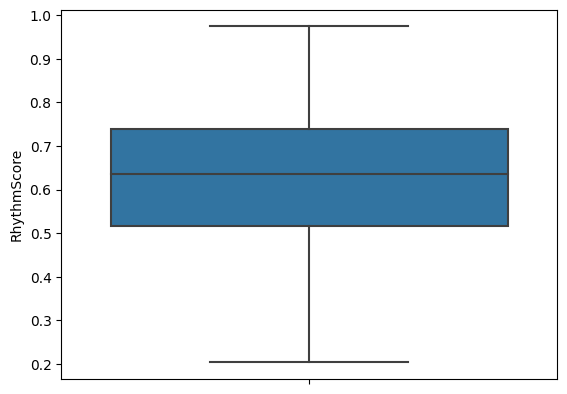

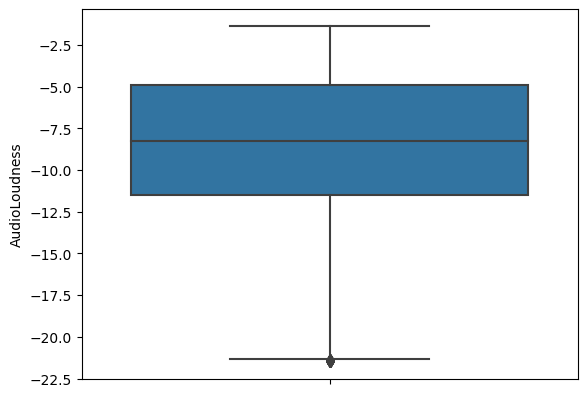

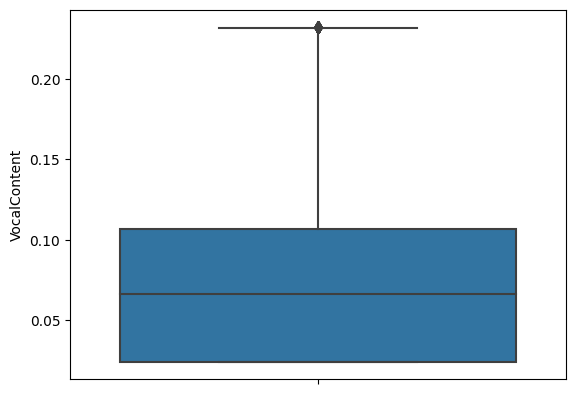

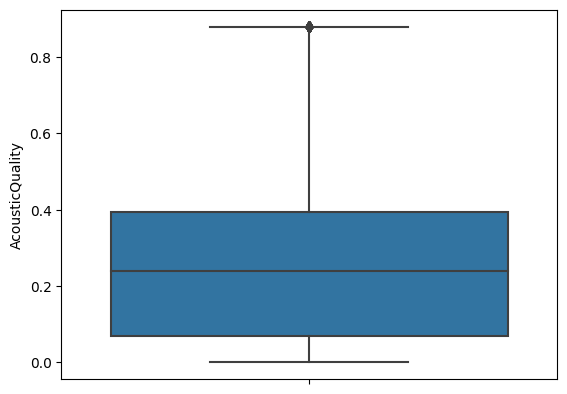

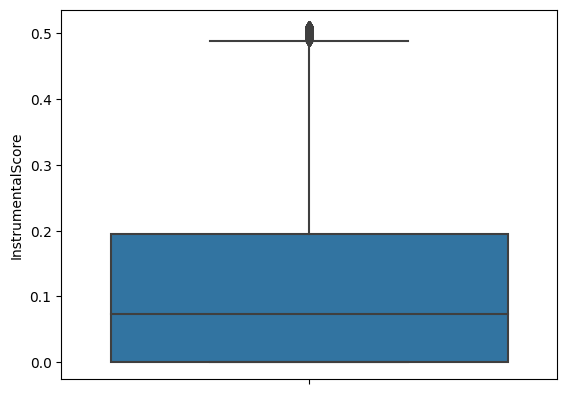

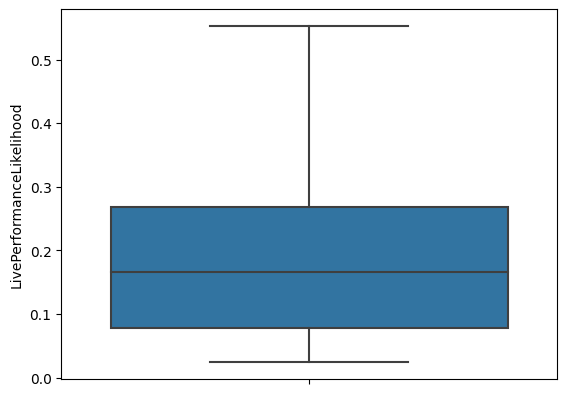

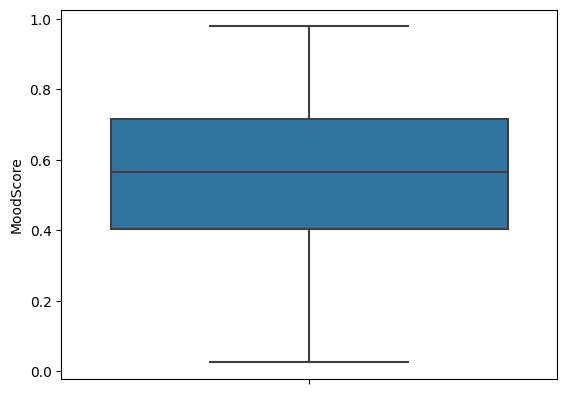

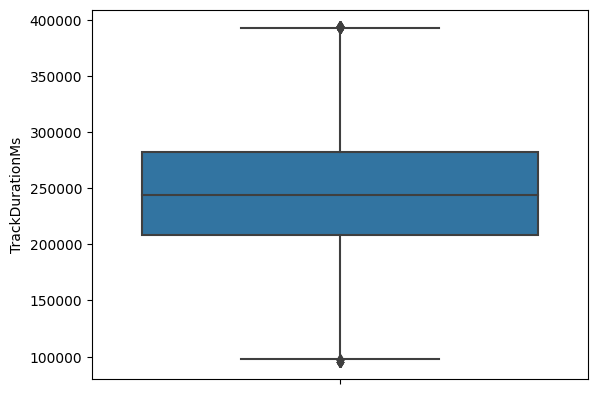

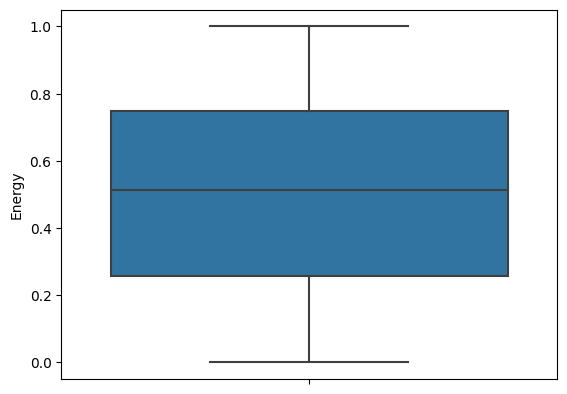

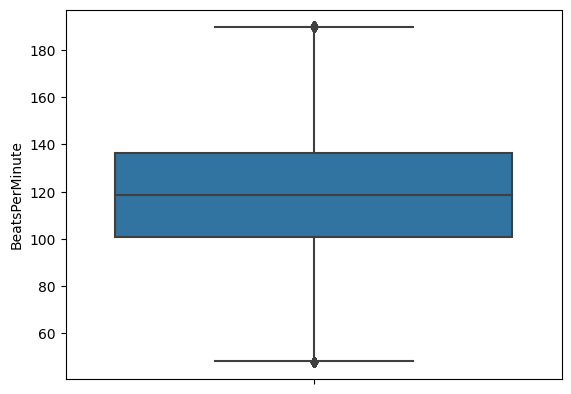

In [433]:
for c in cols:
  sns.boxplot(data = df, y =df[c] )
  print()
  plt.show()

Outliers removed

## Data Visualization

### Comparing with BPM

In [434]:
print(cols)

Index(['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')


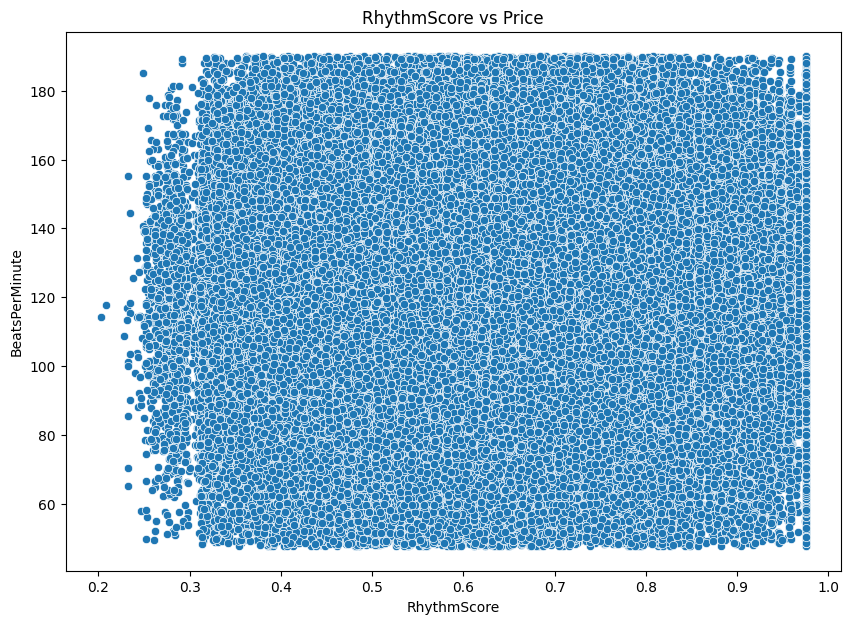

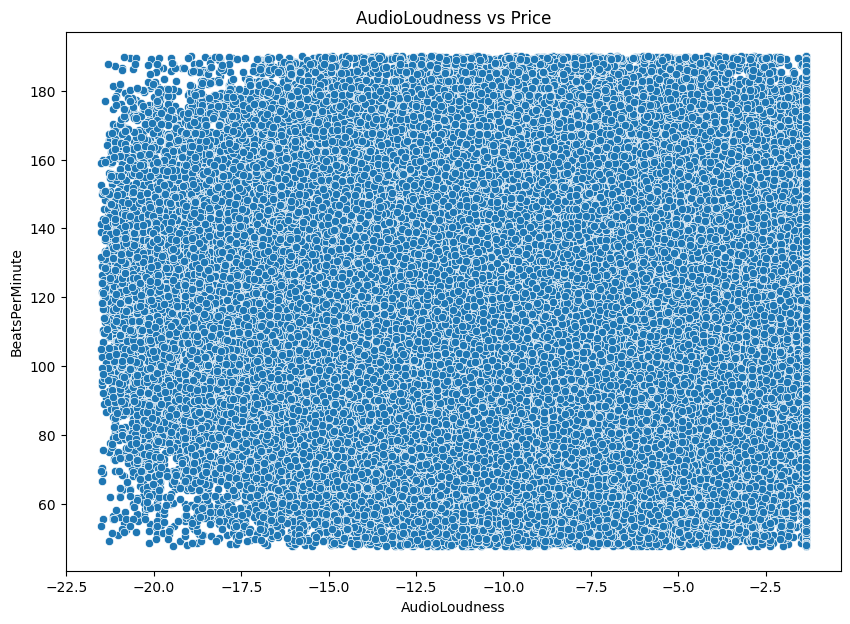

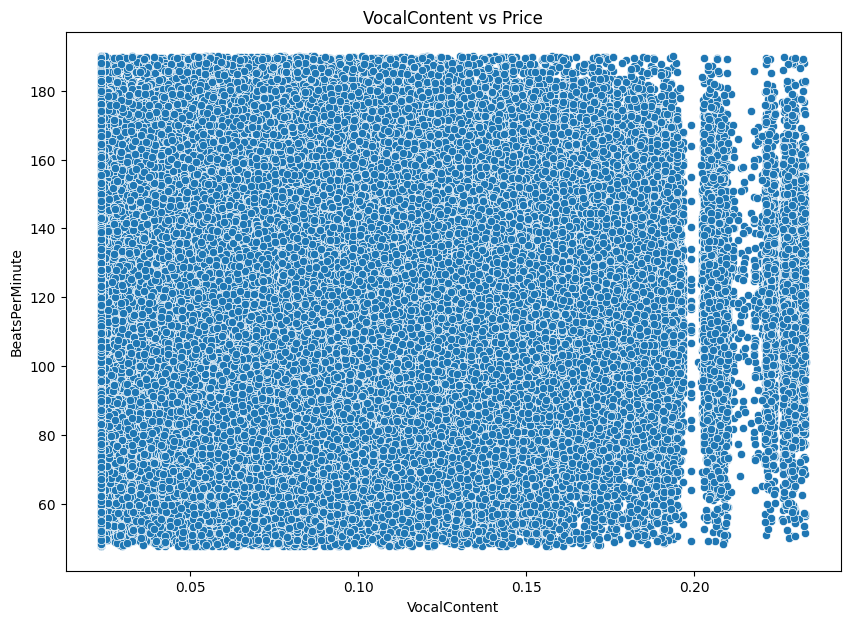

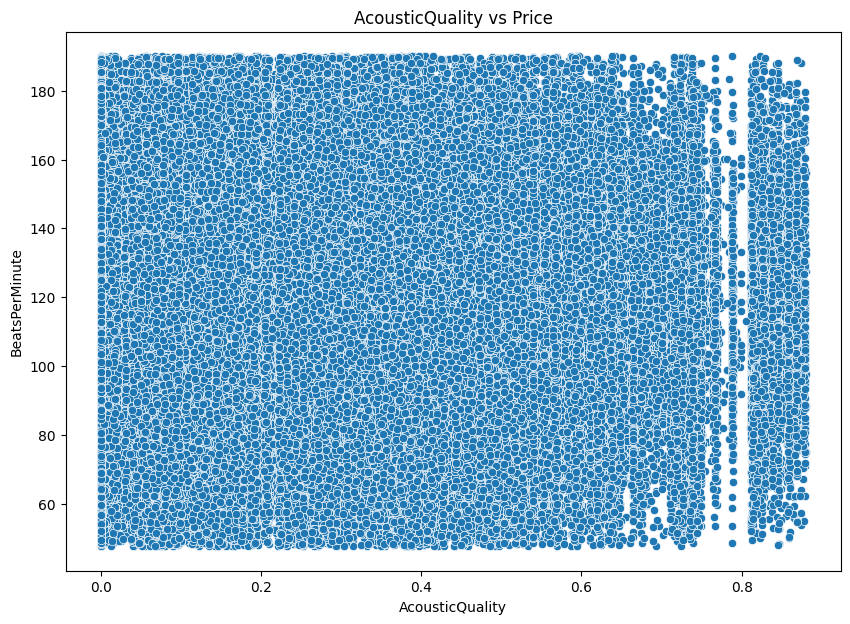

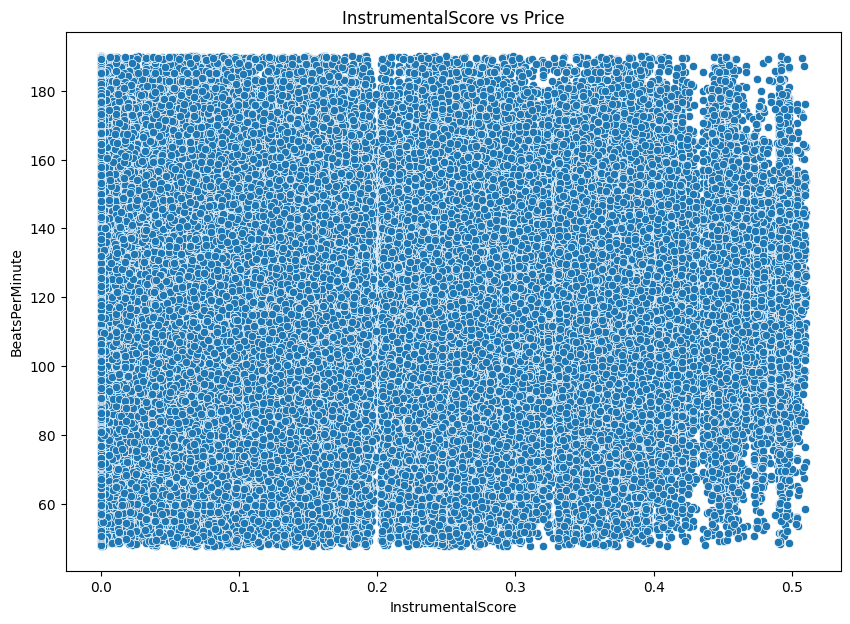

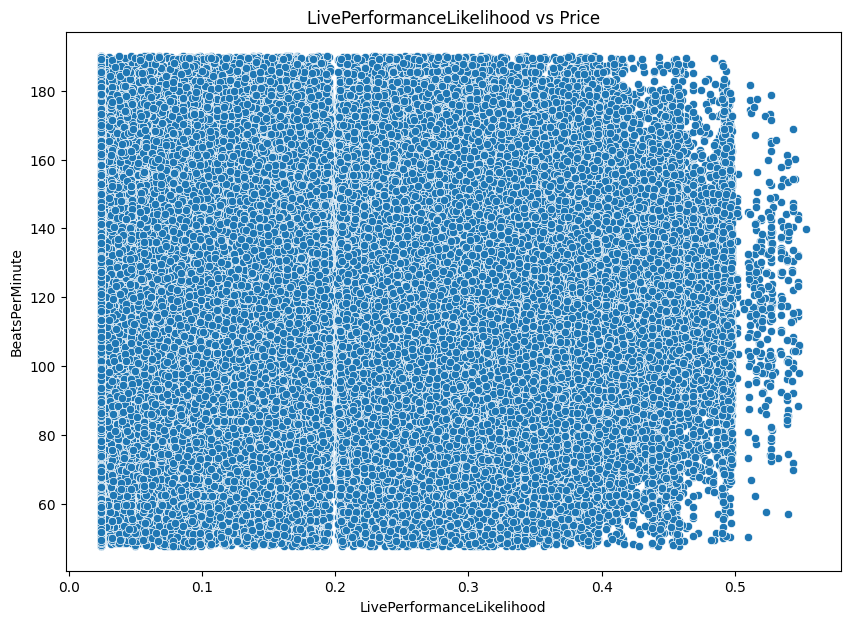

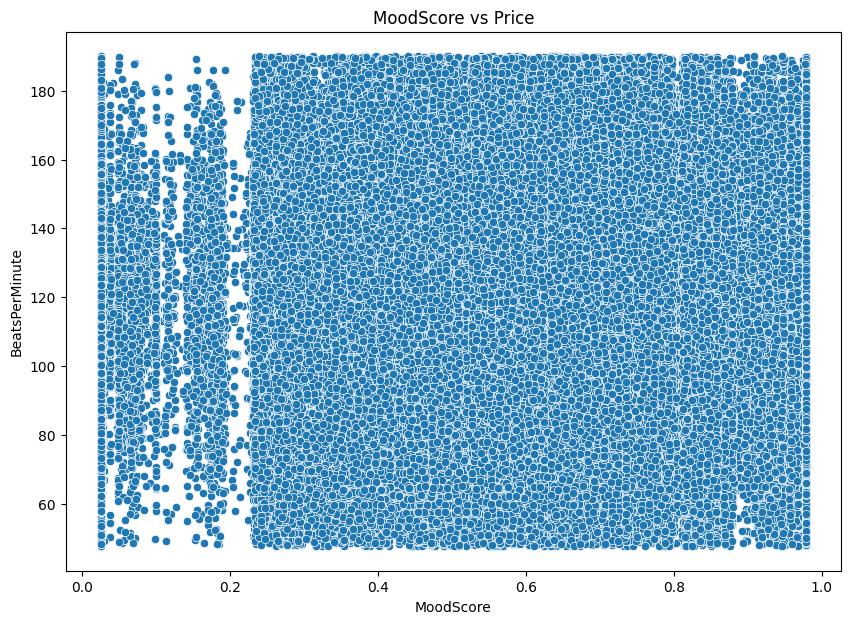

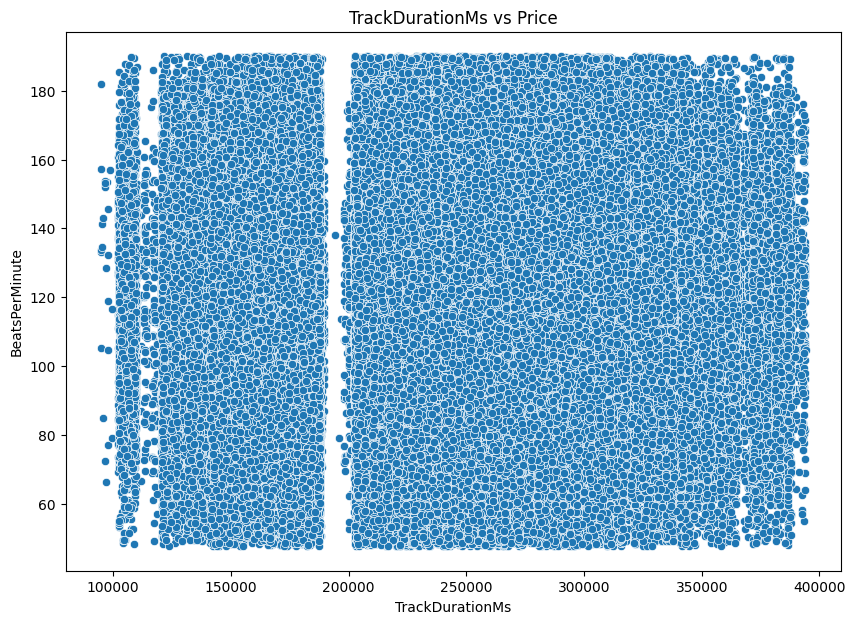

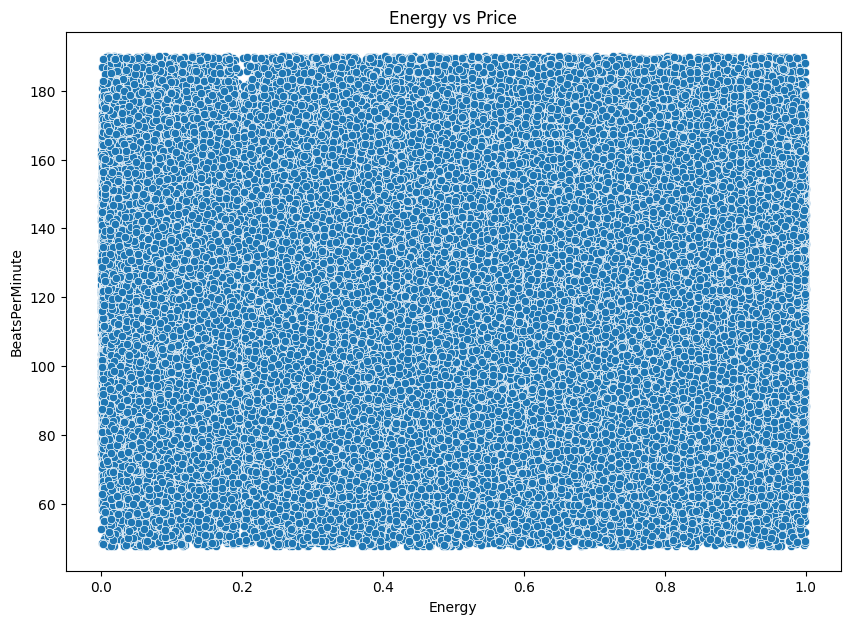

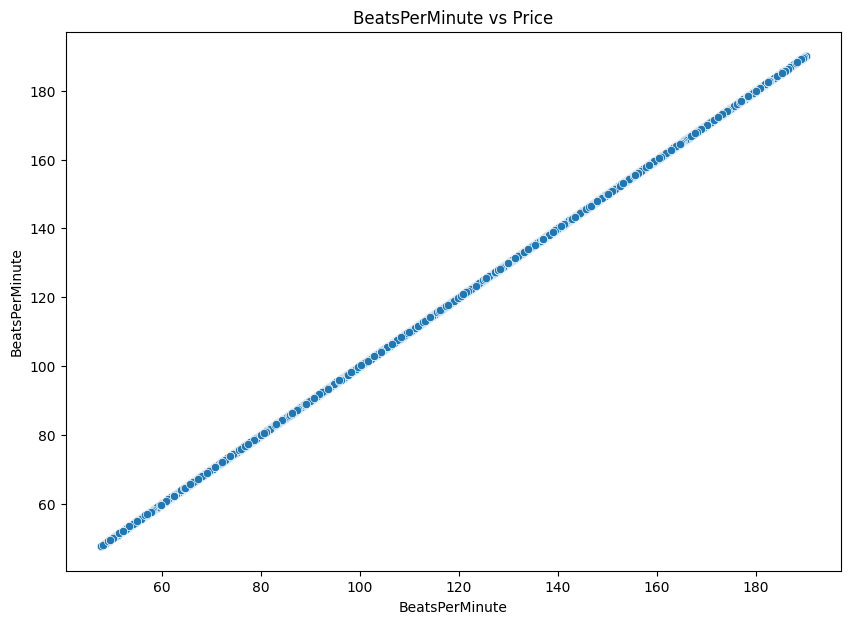

In [435]:
for c in cols:
  plt.figure(figsize=(10,7))
  sns.scatterplot(data = df, x = df[c], y = df['BeatsPerMinute'])
  print()
  plt.title(f"{c} vs Price")
  plt.show()

Therefore no proper relation found

### Heatmap

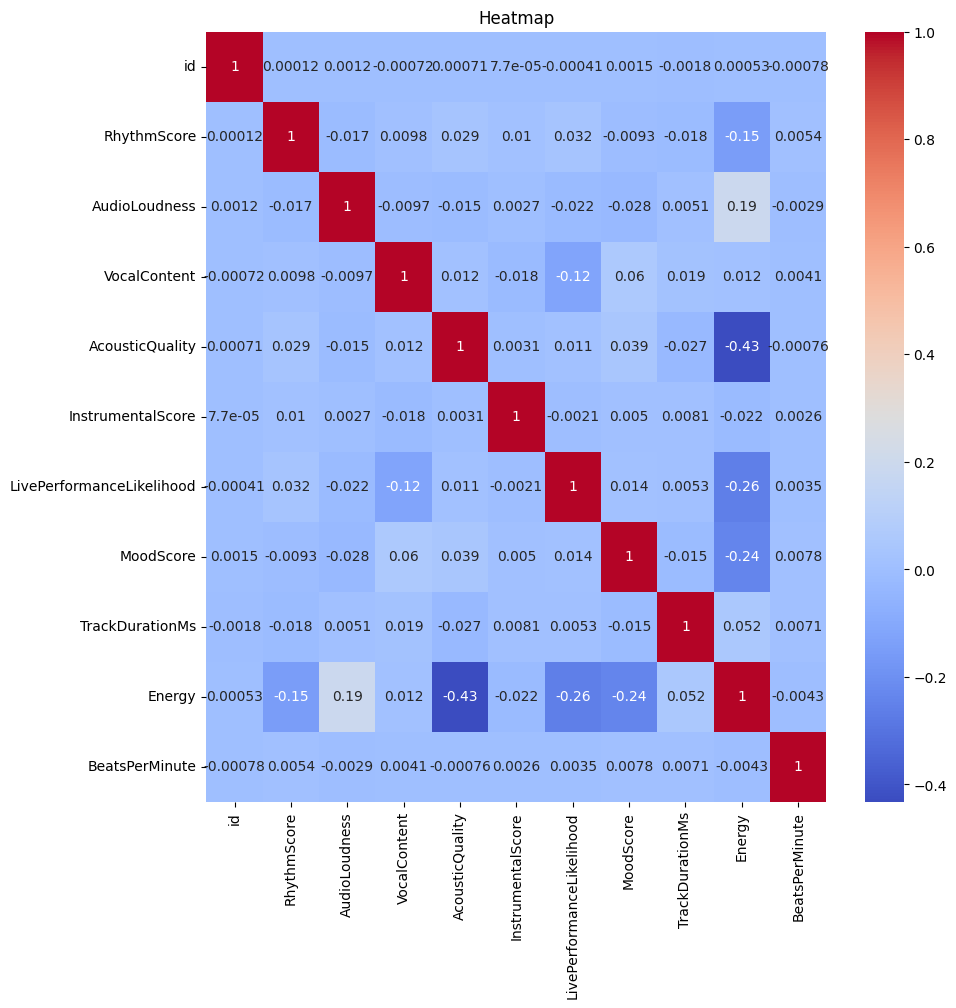

In [436]:
corr_mat = df.corr(numeric_only = True)
plt.figure(figsize = (10,10))
sns.heatmap(corr_mat,annot = True ,cmap = 'coolwarm')
plt.title('Heatmap')
plt.show()

Therefore there is not data directly related hance feture engineerinng is required

## Relation of Features with BPM

### Meaning of given metrics w.r.t. BPM

- RhythmScore (High): Clear, steady beat → usually higher BPM.

- AudioLoudness (High): Loud, powerful sound → tends toward higher BPM.

- VocalContent (High): Voice-heavy → usually medium BPM for clarity.

- AcousticQuality (High): Natural, clear instruments → usually lower or moderate BPM.

- InstrumentalScore (High): Strong instrumental drive → usually higher BPM.

- LivePerformanceLikelihood (High): Live-like feel → usually medium BPM.

- MoodScore (High): Energetic/happy vibe → usually higher BPM.

- TrackDuration (High/Long): Longer song → usually lower BPM.

- Energy (High): Active, driving feel → usually higher BPM.

<u>Quick Summary (High Score → BPM Tendency)</u>

*   RhythmScore → ↑ BPM

- AudioLoudness → ↑ BPM

- VocalContent → ~ Medium BPM

- AcousticQuality → ↓ BPM

- InstrumentalScore → ↑ BPM

- LivePerformanceLikelihood → ~ Medium BPM

- MoodScore → ↑ BPM

- TrackDuration → ↓ BPM

- Energy → ↑ BPM


# Feature Engineering

In [437]:
df.head()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [438]:
cols

Index(['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [439]:
df2 = df.copy()

In [440]:
df2.head()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

## Adding Features

1. **Beat Intensity Index (BII)**

👉 **Significance:** Measures how *powerful* the beats feel. A stronger beat usually means a higher BPM.

**Formula:**
```markdown
BII = (RhythmScore × Energy × AudioLoudness) / 100


In [441]:
df2['BII'] = df2['RhythmScore'] * df2['Energy'] * df2['AudioLoudness'] *0.01

2. Vocal Energy Ratio (VER)

👉 Significance: Measures how much the singer drives the rhythm compared to instruments. High VER usually means steady, medium BPM; low VER allows wider BPM variation.

Formula:
```markdown
VER = (VocalContent × Energy) / (InstrumentalScore + 1)

In [442]:
df2['VER'] = (df['VocalContent'] * df['Energy'] ) / (df['InstrumentalScore']+1)

3. Acoustic Rhythm Clarity (ARC)

👉 Significance: Shows how clear the beat is in the sound. Higher ARC makes BPM easier to detect, often linked with more stable tempos.

Formula:
```markdown
ARC = (RhythmScore × AcousticQuality) / (1 + TrackDurationMs/600000)
```

(600000 = 10 minutes in ms)

In [443]:
df2['ARC'] = (df2['RhythmScore'] * df2['AcousticQuality'])/ (1+ df2['TrackDurationMs']/600000)

4. Mood-Tempo Alignment (MTA)

👉 Significance: Captures whether the mood matches the tempo. High MTA = fast, energetic BPM; low MTA = slower, calmer BPM.

Formula:
```markdown
MTA = (MoodScore × Energy) / (BII + 1)

In [444]:
df2['MTA'] = (df2['MoodScore'] * df2['Energy']) / (df2['BII']+1)

5. Live Tempo Factor (LTF)

👉 Significance: Measures how “live” the rhythm feels. Higher LTF suggests natural, moderate BPM rather than robotic extremes.

Formula:
```markdown
LTF = (LivePerformanceLikelihood × RhythmScore) / (Energy + 1)

In [445]:
df2['LTF'] = (df2['LivePerformanceLikelihood'] * df2['RhythmScore']) / (df2['Energy'] +1)

6. Tempo Prediction Score (TPS)

👉 Significance: A combined score that predicts BPM by blending rhythm, vocals, mood, and energy factors. Higher TPS → higher BPM, lower TPS → lower BPM.

Formula:
```markdown
TPS = (0.4 × BII) + (0.2 × VER) + (0.2 × ARC) + (0.1 × MTA) + (0.1 × LTF)

In [446]:
df2['TPS'] = (0.4 * df2['BII']) + (0.2 * df2['VER']) + (0.1 * df2['ARC']) + (0.1 * df2['MTA']) + (0.1 * df2['LTF'])

In [447]:
df.head()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [448]:
df2.head()

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute       BII       VER       ARC       MTA       LTF  \
0  0.826267       147.53020 -0.038089  0.019417  0.000002  0.352069  0.016984   
1  0.145400       136.15963 -0.015125  0.007706  0.223286  0.096111  0.095199   
2  0.624667        55.31989 -0.051277  0.047571  0.069238  0.279085  0.009367   
3  0.487467       147.91212 -0.004858  0.022263  0.000881  0.136542  0.042645   
4  0.947333        89.58511 -0.065922  0.022262  0.026985  0.484549  0.090686   

        TPS  
0  0.025553  
1  0.036951  
2  0.024772  
3  0.020516  
4  0.038306

In [449]:
new_cols = ['BII', 'VER', 'ARC', 'MTA', 'LTF','TPS']

In [450]:
print(df2['BII'].dtype)

float64


## Visualizing new Features vs BPM

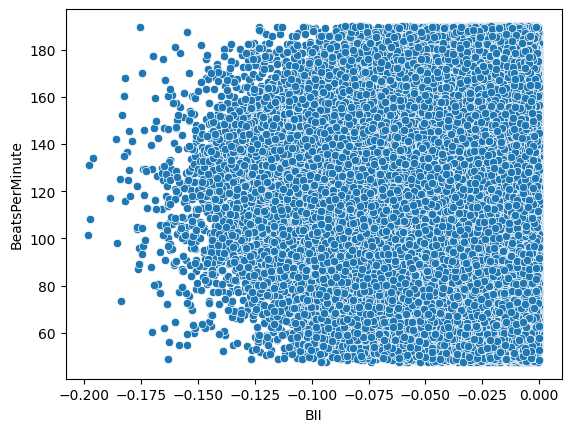

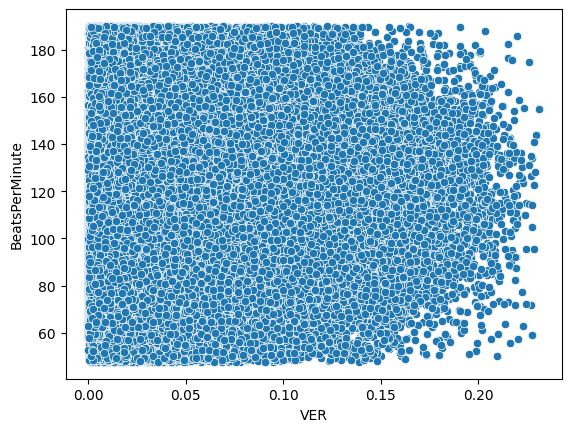

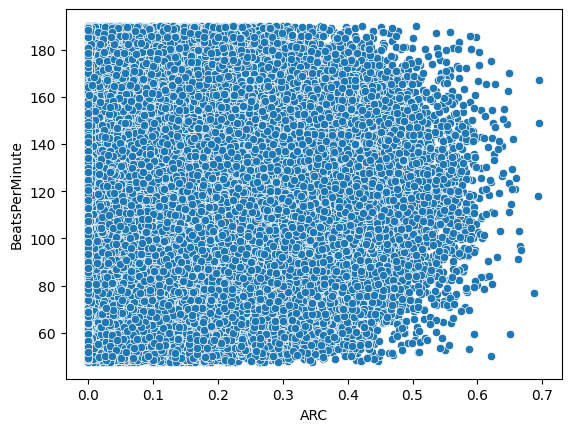

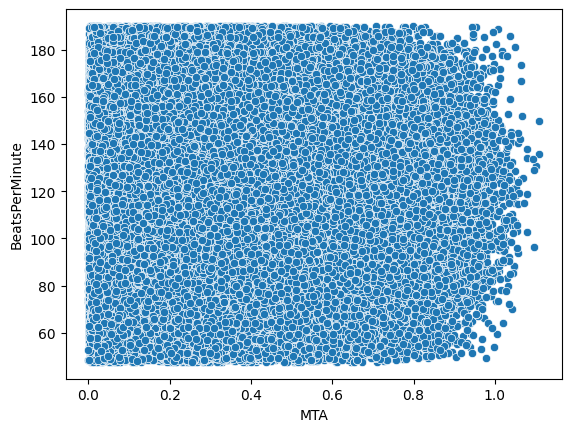

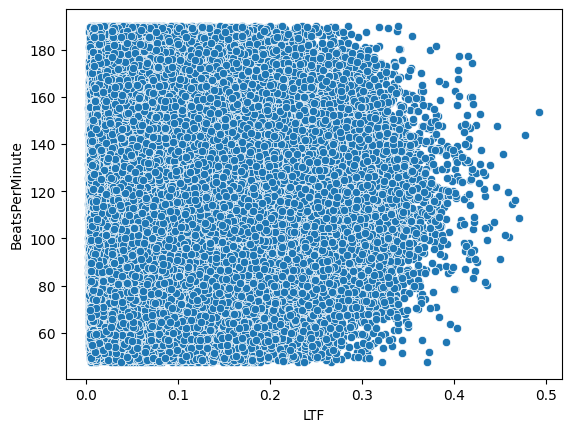

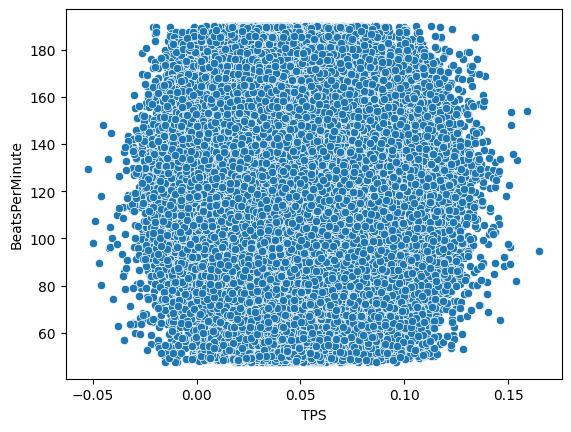

In [451]:
for nc in new_cols:
  sns.scatterplot(df2, x = nc, y = df2['BeatsPerMinute'])
  plt.xlabel(nc)
  plt.ylabel('BeatsPerMinute')
  plt.show()

In [452]:
n_corr = df2[new_cols].corr(numeric_only = True)

<Axes: >

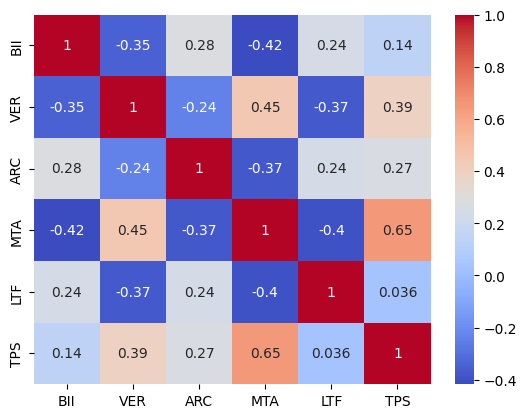

In [453]:
# plt.figure(figsize = (6,6))
sns.heatmap(n_corr, annot = True, cmap = 'coolwarm')

Hence Will have to work with the ml model as the relation are not on point

# Predictions

## Train Test Split and Scaling

In [454]:
print(df2.columns)

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute', 'BII', 'VER', 'ARC',
       'MTA', 'LTF', 'TPS'],
      dtype='object')


Hyper Parameter Tuning on a smaller(35%) sample of the data

In [630]:
# sample_df = df2.sample(frac = 0.25, random_state = 45)
sample_df = df2.copy()

In [631]:
from sklearn.model_selection import train_test_split
data = sample_df.drop(['id', 'BeatsPerMinute','AcousticQuality','MTA','ARC','BII'], axis = 1)
target = sample_df['BeatsPerMinute']
X_train,x_test, Y_train, y_test = train_test_split(data, target, train_size = 0.8, test_size = 0.2, random_state = 2)

In [632]:
# from sklearn.preprocessing import StandardScaler
# scl = StandardScaler()
# scl.fit(X_train)
# X_train_scaled = pd.DataFrame(
#     scl.transform(X_train), 
#     columns=X_train.columns, 
#     index=X_train.index
# )

## Model Selection and Hyper Parameter Tuning

In [633]:
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [634]:
param_RF = {
    'min_samples_leaf': [1,5,10,15],
    'min_weight_fraction_leaf': [0.0,0.1,0.2],
    'random_state':[2],
    'min_impurity_decrease': [0.0,0.1,0.5],
    'ccp_alpha':[0.0,0.1,0.5],
}

XGBRegressor parameters<br>
xgb = XGBRegressor(objective='reg:squarederror',
                   eval_metric = 'rmse', n_estimators=1000, learning_rate=0.05, max_depth=7, min_child_weight = 5, gamma = 5, tree_method="hist", n_jobs=-1, random_state=45, reg_alpha = 0.5, early_stoping_rounds = 20)

In [635]:
param_XG = {
    'objective':['reg:squarederror'],
    'eval_metric': ['rmse'],
    'n_estimators': [1200,1300,1400],
    'learning_rate': [0.001,0.005,0.009],
    'max_depth': [3],
    'min_child_weight': [5],
    'gamma': [1,2,5],
    'tree_method':['hist'],
    'device':['cuda'],
    'n_jobs':[-1],
    'random_state':[45],
    'reg_alpha':[0.1],
}
# xgb = XGBRegressor(device = 'cuda', eval_metric = 'rmse', gamma = 2, learning_rate = 0.005, max_depth = 3, min_child_weight = 5, 
#                    n_estimators = 1300, n_jobs = -1, objective = 'reg:squarederror', random_state = 45, reg_alpha = 0.1, reg_lambda = 1 ,
#                    tree_method = 'hist')

In [636]:
model_params = {
    # RandomForestRegressor(): param_RF,
    XGBRegressor(): param_XG
}

In [637]:
for k,v in model_params.items():
    
    reg = GridSearchCV(
        k, v, cv = 5, return_train_score = False
    )
    
    reg.fit(X_train, Y_train)
    rst = pd.DataFrame(reg.cv_results_)
    print(f"For {k}:-")
    # print(rst[['param_min_samples_leaf', 'param_min_weight_fraction_leaf', 'min_impurity_decrease', 'ccp_alpha','mean_test_score']])
    print(f"Best Score = {reg.best_score_}\nBest parameters = {reg.best_params_}")

For XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...):-
Best Score = 0.0005565476082434406
Best parameters = {'device': 'cuda', 'eval_metric': 'rmse', 'gamma': 1, 'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1200, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_

Best parameters = {'device': 'cuda', 'eval_metric': 'rmse', 'gamma': 1, 'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1200, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_state': 45, 'reg_alpha': 0.1, 'tree_method': 'hist'}

# Model Selection

In [464]:
linear_m = LinearRegression()

In [465]:
d_tree = DecisionTreeRegressor(random_state = 42)

In [466]:
# r_forest = RandomForestRegressor(n_estimators = 100, random_state = 2)

In [638]:
xgb = XGBRegressor(device = 'cuda', eval_metric = 'rmse', gamma = 1, learning_rate = 0.005, max_depth = 3, min_child_weight = 5, 
                   n_estimators = 1200, n_jobs = -1, objective = 'reg:squarederror', random_state = 45, reg_alpha = 0.1, reg_lambda = 1 ,
                   tree_method = 'hist')
#xgb = XGBRegressor(device = 'cuda', eval_metric = 'rmse', gamma = 2, learning_rate = 0.005, max_depth = 3, min_child_weight = 5, 
#                   n_estimators = 1300, n_jobs = -1, objective = 'reg:squarederror', random_state = 45, reg_alpha = 0.1, reg_lambda = 1 ,
#                   tree_method = 'hist')

Best parameters = {'device': 'cuda', 'eval_metric': 'rmse', 'gamma': 1, 'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1200, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_state': 45, 'reg_alpha': 0.1, 'tree_method': 'hist'}

In [639]:
lst = [linear_m,xgb]#d_tree, r_forest,d_tree

In [640]:
df2.shape

(505206, 17)

In [641]:
data1 = df2.drop(['id', 'BeatsPerMinute' ,'AcousticQuality','MTA','ARC','BII'], axis = 1) #,'BII', 'VER', 'ARC','MTA', 'LTF', 'TPS'  
target1 = df2['BeatsPerMinute']
X_train1,x_test1, Y_train1, y_test1 = train_test_split(data1, target1, train_size = 0.8, test_size = 0.2, random_state = 2)

In [642]:
# scl1 = MinMaxScaler(feature_range = (BPM_min,BPM_max))
# scl1.fit(X_train1)
# X_train_scaled1 = pd.DataFrame(
#     scl1.transform(X_train1), 
#     columns=X_train1.columns, 
#     index=X_train1.index
# )

In [643]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for model in lst:
    model.fit(X_train1,Y_train1)
    y_pred1 = model.predict(x_test1)
    MAE = mean_absolute_error(y_test1, y_pred1)
    MSE = mean_squared_error(y_test1, y_pred1)
    RMSE = np.sqrt(MSE)
    r2 = r2_score(y_test1, y_pred1)
    print(f"{model}:-\nMAE = {MAE}\nMSE = {MSE}\nRMSE = {RMSE}\nR2 = {r2}\n")

LinearRegression():-
MAE = 21.029065168886422
MSE = 682.4014250067746
RMSE = 26.122814262762247
R2 = 0.0001518402085376458

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=-1,
             num_parallel_tree=None, random_state=45, ...):-
MAE = 21.024389813915583
MSE = 682.126252509845
RMSE = 26.117546831772792
R2 = 0.0005550203670162679



RMSE = 26.117546831772792

In [644]:
xgb.fit(data1,target1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=-1,
             num_parallel_tree=None, random_state=45, ...)

In [645]:
linear_m.fit(data1,target1)

LinearRegression()

In [646]:
xgb.save_model("xgb_bps.json")

# Checking model with test.csv

In [647]:
test_df = pd.read_csv("/kaggle/input/train-and-test-data/test.csv")

In [648]:
test_df.shape

(174722, 10)

In [649]:
test_df.drop_duplicates(inplace= True)
test_df.shape

(174722, 10)

In [650]:
test_df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
dtype: int64

## Feature Engineering

In [651]:
test_df['BII'] = test_df['RhythmScore'] * test_df['Energy'] * test_df['AudioLoudness'] *0.01
test_df['VER'] = (test_df['VocalContent'] * test_df['Energy'] ) / (test_df['InstrumentalScore']+1)
test_df['ARC'] = (test_df['RhythmScore'] * test_df['AcousticQuality'])/ (1+ test_df['TrackDurationMs']/600000)
test_df['MTA'] = (test_df['MoodScore'] * test_df['Energy']) / (test_df['BII']+1)
test_df['LTF'] = (test_df['LivePerformanceLikelihood'] * test_df['RhythmScore']) / (test_df['Energy'] +1)
test_df['TPS'] = (0.4 * test_df['BII']) + (0.2 * test_df['VER']) + (0.1 * test_df['ARC']) + (0.1 * test_df['MTA']) + (0.1 * test_df['LTF'])

In [652]:
new_cols

['BII', 'VER', 'ARC', 'MTA', 'LTF', 'TPS']

In [653]:
id_col = test_df['id']
test_df.drop(['id','AcousticQuality','MTA','ARC','BII'], axis = 1,inplace = True)#,'MTA','ARC','BII'
# new_cols_test = ['BII', 'VER', 'ARC', 'MTA', 'LTF', 'TPS']
# test2 = test_df[new_cols]


In [654]:
id_col 

0         524164
1         524165
2         524166
3         524167
4         524168
           ...  
174717    698881
174718    698882
174719    698883
174720    698884
174721    698885
Name: id, Length: 174722, dtype: int64

In [655]:
# scl_test = MinMaxScaler(feature_range = (BPM_min,BPM_max))
# scl_test.fit(test_df)
# test_scaled = pd.DataFrame(
#     scl_test.transform(test_df), 
#     columns=test_df.columns, 
#     index=test_df.index
# )

# scl_test.fit(test2)
# test_scaled = pd.DataFrame(
#     scl_test.transform(test2), 
#     columns=test2.columns, 
#     index=test2.index
# )

In [656]:
# test_scaled

In [657]:
result = {'id':id_col}


In [658]:
result['BeatsPerMinute'] = xgb.predict(test_df)
result_df = pd.DataFrame(result)

In [659]:
result_df

id  BeatsPerMinute
0       524164      118.843262
1       524165      118.521111
2       524166      119.020500
3       524167      119.022499
4       524168      119.131447
...        ...             ...
174717  698881      118.724701
174718  698882      119.088440
174719  698883      118.827858
174720  698884      118.713539
174721  698885      118.989700

[174722 rows x 2 columns]

In [660]:
result_df.to_csv("Output_XGB_optimized1.csv",index=False)